In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Read the CSV file
df = pd.read_csv("results.csv")

avg=0
sum=0
avg_list = []
for idx in range(df.shape[0]):
    if idx %10 == 0:
        sum=0
        avg=0
    sum += df.iloc[idx,3]
    avg = sum/(df.iloc[idx,0])
    avg_list.append(avg)
    
df['Average'] = avg_list
df.head(12)

,S.no,File,Input Size,Time Taken,Average
0,1,seq_mXv.exe,64,0.000042,0.000042
1,2,seq_mXv.exe,64,0.000046,0.000044
2,3,seq_mXv.exe,64,0.000041,0.000043
3,4,seq_mXv.exe,64,0.000046,0.000044
4,5,seq_mXv.exe,64,0.000131,0.000061
5,6,seq_mXv.exe,64,0.000046,0.000059
6,7,seq_mXv.exe,64,0.000046,0.000057
7,8,seq_mXv.exe,64,0.000046,0.000055
8,9,seq_mXv.exe,64,0.000046,0.000054
9,10,seq_mXv.exe,64,0.000052,0.000054


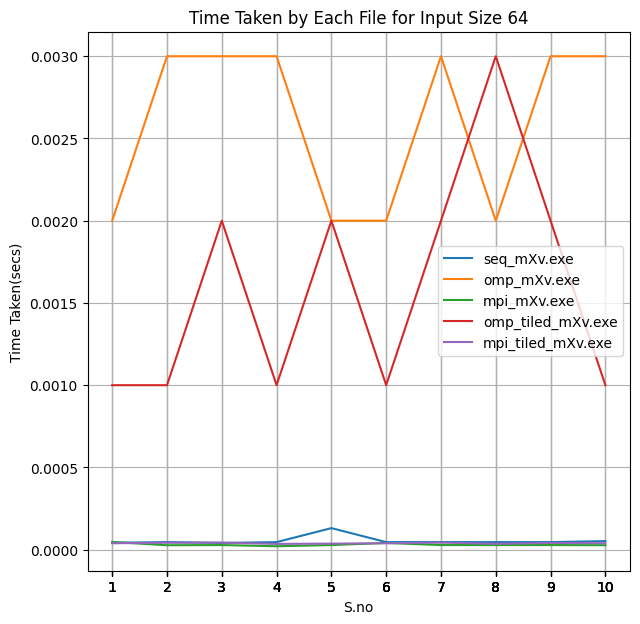

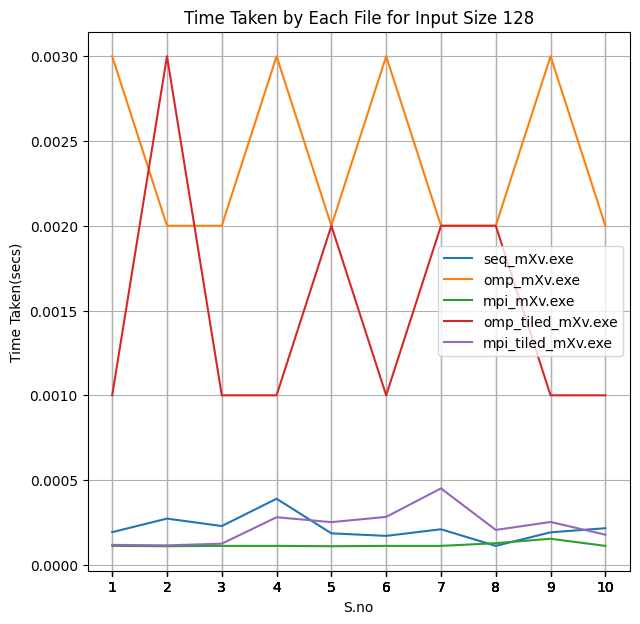

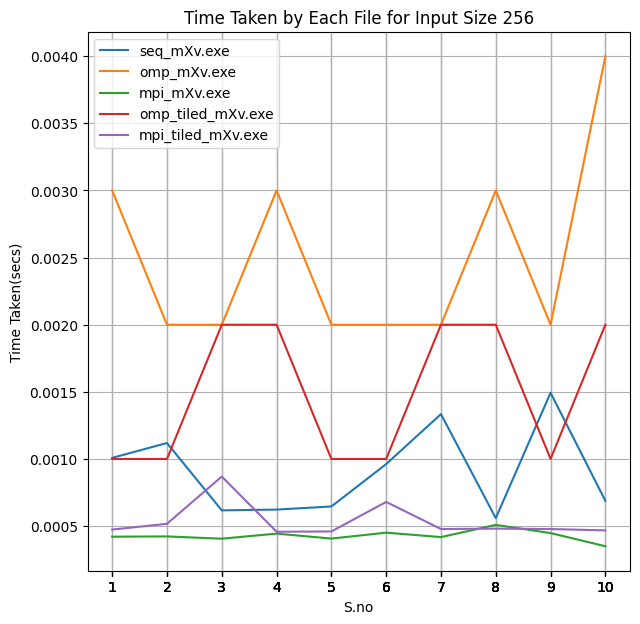

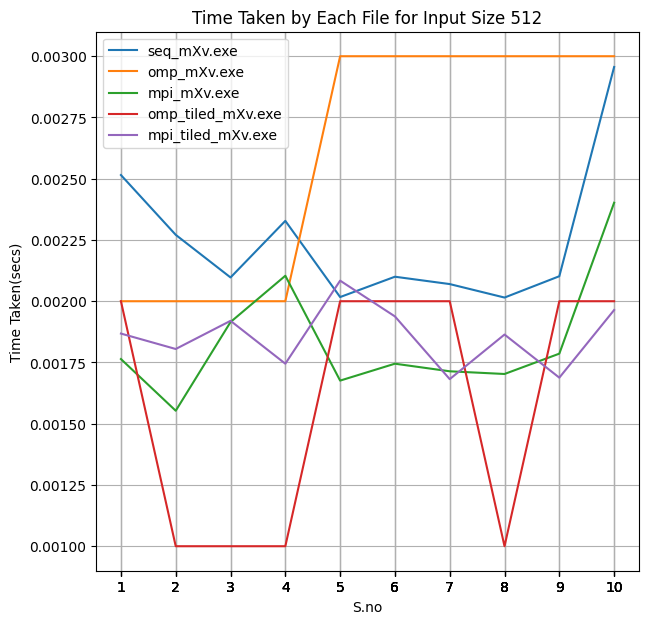

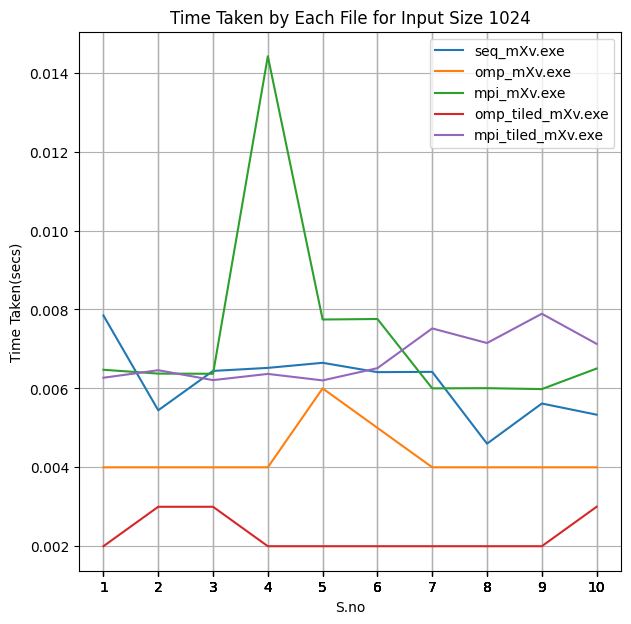

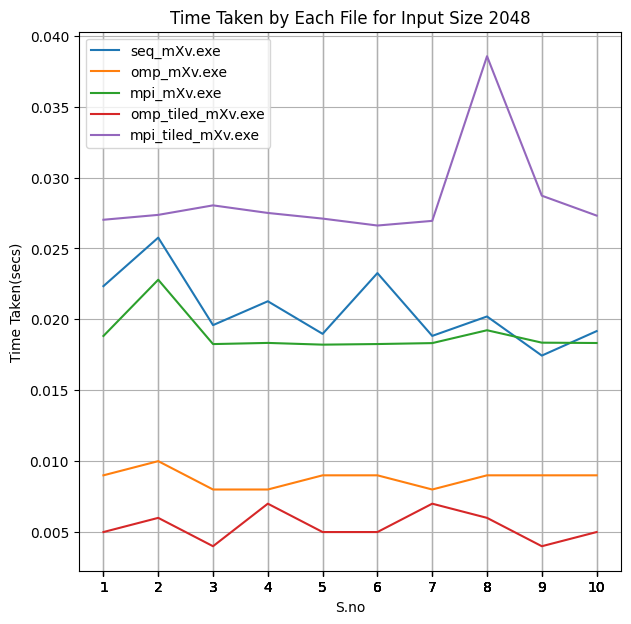

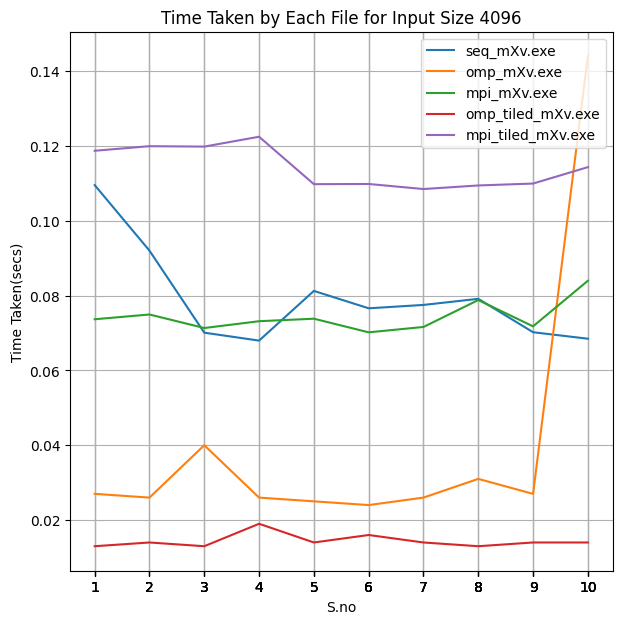

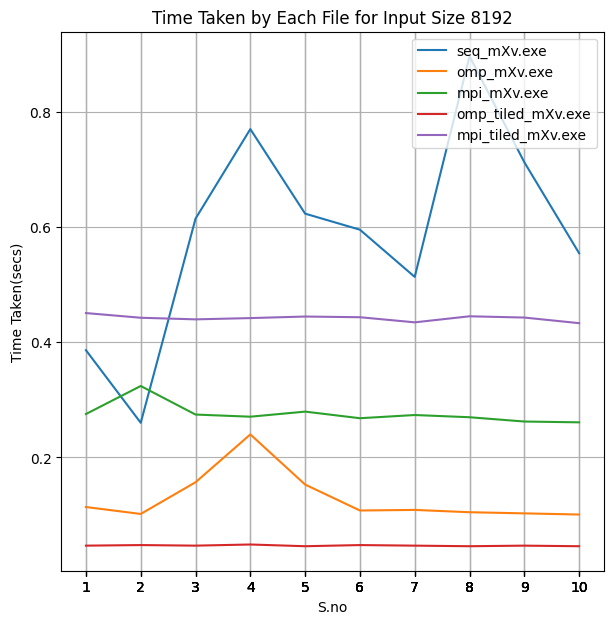

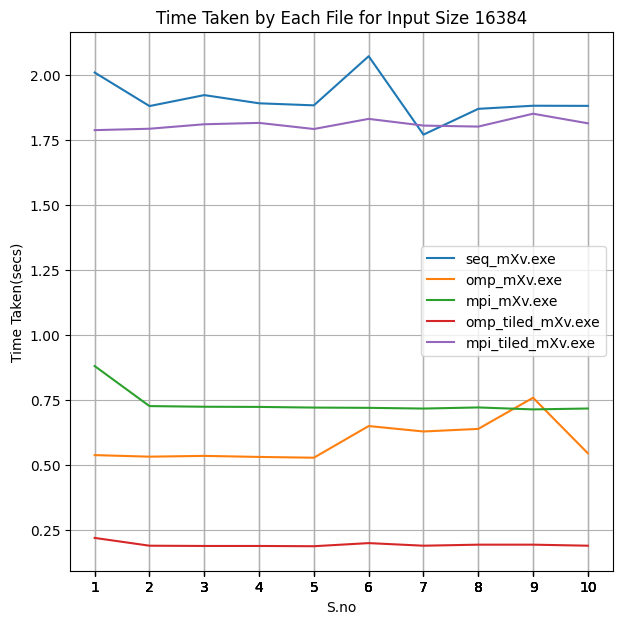

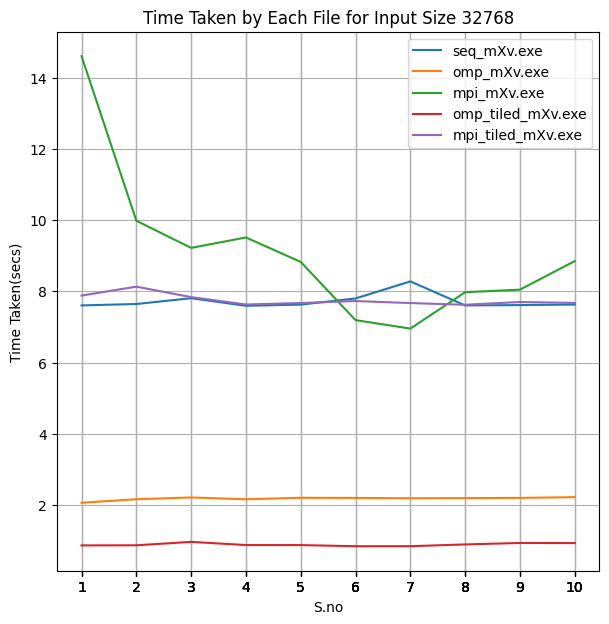

In [94]:

# Get unique input sizes
input_sizes = df['Input Size'].unique()

# Plot for each input size
for size in input_sizes:
    input_data = df[df['Input Size'] == size]
    plt.figure(figsize=(7, 7))
    for file in input_data['File'].unique():
        file_data = input_data[input_data['File'] == file]
        plt.plot(file_data['S.no'], file_data['Time Taken'], label=file)
    plt.title(f'Time Taken by Each File for Input Size {size}')
    plt.xlabel('S.no')
    plt.xticks(input_data['S.no'])
    plt.ylabel('Time Taken(secs)')
    plt.legend()
    plt.grid(True)
    plt.show()

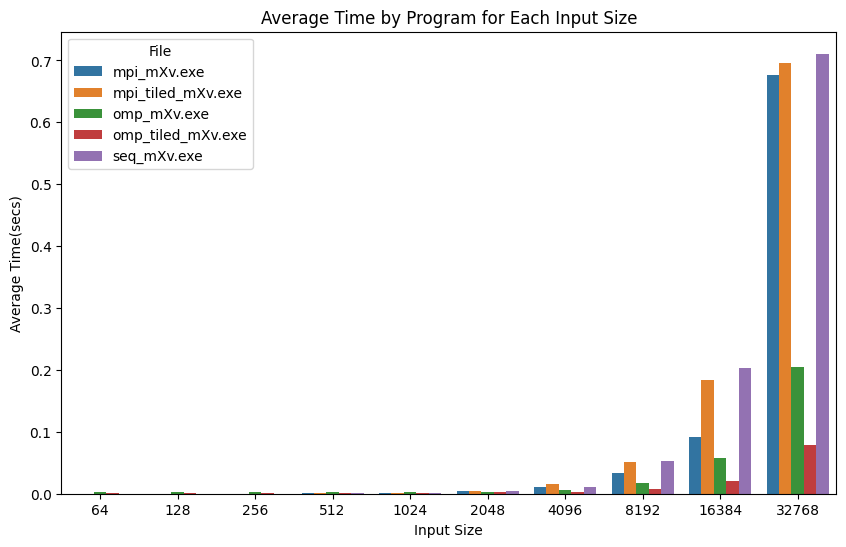

In [95]:
# Calculate average time for each program at each input size
average_time_by_program = df.groupby(['File', 'Input Size'])['Average'].mean().reset_index()

# Plot count plot
plt.figure(figsize=(10, 6))
sns.barplot(data=average_time_by_program, x='Input Size', y='Average', hue='File')
plt.title('Average Time by Program for Each Input Size')
plt.xlabel('Input Size')
plt.ylabel('Average Time(secs)')
plt.show()